# BioE 101 Lab 2#

## Objectives: ##

- Learn how to program with IPython

- Use IPython to plot signals in the time and frequency domain

- Observe aliasing, harmonic distortion, and quantization error in sampled data

- Connect a microphone to your Arduino

- Estimate noise and SNR from microphone recordings

- Build an algorithm with IPython to distinguish you and your partner’s voice




##1.  Displaying signals in time and frequency domain with Python


- Connect your function generator to the MyDAQ analog input 0. Make sure
the ground wire is connected to ground on your MyDAQ. You will need to
use the BNC binding post adapters and two pieces of wire.

- Add a “DAQ Assist” block to your block diagram. Configure this block to
acquire voltage signals from analog input 0. Use the appropriate settings to
record waveforms with a maximum frequency of 500Hz (Nyquist) and
10Vpp. The samples to read buffer should be set up so that the buffer will
span a half second. 

    i. Labview will automatically place your DAQ Assist block inside a
while loop to enable continuous acquisition. It will not, however,
enclose the rest of the components you create below in a while loop.
You should create a single while loop now to enclose everything
created below.

- Once your DAQ Assistant is set up, add a waveform graph to your front
panel (note: don’t use a waveform “chart”…it’s behavior is slightly different)

- Connect the “data” output of your DAQ Assistant block to the input of your
Waveform Graph. Make sure the Graph is located within the while loop on
your block diagram so that it gets updated every time the loop executes.

- Set your function generator to output a sinusoid at 100Hz, 2Vpp.

- Run your Labview VI and verify that you can see the signal from the function
generator. Do this with a waveform graph, not waveform chart. By default,
the axes autoscale. You can manually adjust the X/Y scale of the graph by
right clicking on the axes and turning off autoscale and then clicking on the
labels and changing them yourself, or by right clicking on the graph and
editing the property pages. Experiment with it until you get a comfortable
view of your waveform.

- Now add a “Spectral Measurement” block from the list of Express VIs.
Configure it with the following parameters:
i. Magnitude RMS, dB
ii. Hanning window

- Connect the “data” output of the DAQ Assistant to the “Signals” input of the
Spectral Measurements.

- Connect the “FFT (RMS)” output to another waveform graph (again, not
chart). Note that by default the X axis is “time”, so you should change this to
“frequency” by double-clicking on the text and renaming it. FFT stands for
“Fast Fourier Transform” and it is a computationally efficient algorithm for
computing a Fourier transform.

- Set your function generator to a 100 Hz, 1V sine wave. Run your VI and
verify that you observe a peak in the frequency domain corresponding to the
frequency of your function generator. Note that the frequency span is set to 0-
500 Hz automatically, based on your sampling rate of 1 kHz.




Question 1: Based on your frequency domain plot, what is the RMS magnitude of your
signal in dB? What is the RMS magnitude of your noise floor, approximately? What is
your SNR (in dB)? Keep in mind that dB is logarithmic, so even though noise and signal
are both clearly visible on this plot, they’re really several orders of magnitude apart.

Question 2: Increase the frequency of the function generator to 500 Hz in steps of 100
Hz. What do you see? What happens in the time and frequency domain when you are
above this frequency? What do you observe at 490 Hz and 510 Hz?

Question 3: Switch the input waveform between a 50 Hz square wave and a 50 Hz sine
wave. How does the frequency spectrum change between the square and sine wave?

Question 4: What would you expect to see if you increased amplitude of the signal
beyond what the myDAQ can acquire? Does this phenomenon occur because of a
violation of bandwidth, dynamic range, or sensitivity?

Question 5: What is the magnitude of the 100 Hz peak at 1V in dB? What is it at 10V?
Why?

4. Observing noise using the oscilloscope
(2 students, requires oscilloscope)
a. You can disconnect your function generator and turn it off. Stop your
LabView program from running and remove all wires connected to your
MyDAQ, but keep the LabView program you created open or save it.
b. The next set of questions uses the HP oscilloscope at your lab station.
Question 6: What is the RMS noise voltage that the oscilloscope sees without anything
connected (no probe, no cables)? You may need to increase the Volts/div significantly
to see this, and you will want to use “Auto” triggering. Remember that you can make
this measurement by pressing the “Measure” button.
c. Connect the BNC binding post adapter and connect the banana wires to the
binding posts.

Question 7: What is the RMS noise voltage now? Why did it change?

Question 8: Hold the positive/negative banana wires straight, parallel, and close
together. Observe the RMS noise. Then spread them apart. What happens to the RMS
noise? What happens when you touch the positive terminal? Why is the noise changing
in these cases?

Question 9: Move the positive wire around. What happens when you place it near fans
or power cables behind the computer?
5. Measuring signals from a microphone using the MyDAQ
(2 students, requires MyDAQ and microphone)
a. The microphones you have are known as “electret” condenser microphones.
The sensing element can be thought of as a small capacitor that changes its
capacitance as a function of acoustic pressure. The sensing element is then
connected to a transistor, which converts the capacitance into a voltage signal.
Transistors are active, meaning they need to be powered by an external 
voltage with a series resistor. Hence, in your microphone assemblies, there
are several leads—two short wires (one with a resistor, one without) which
should be connected to analog input 0+ and 0- on your MyDAQ, respectively,
and two long wires which should be connected to +5V (red) and DGND
(black). Check out this Wikipedia entry:
http://en.wikipedia.org/wiki/Electret_microphone.
b. Once the microphone is properly connected, start the same LabView program
you had running earlier. It will be helpful for the following questions to turn
off X- and Y-axis scaling—play around with the scaling to get the best view.

Question 10: What function do you think the serial resistor serves? Remember, the
resistor is hooked up between 5V and the output signal.

Question 11: What is the RMS noise voltage (in dB) with the microphone connected
(without anyone talking into the microphone - make sure to connect 5V power)?

Question 12: Talk into the microphone at a comfortable level. What is the approximate
RMS voltage that you generate while talking? What is your SNR (in dB)?
6. Processing audio signals using Labview
(2 students, requires MyDAQ and microphone)
a. Modify the VI you created earlier by changing the sampling rate to 10k.
Change the buffer size to store 1/10th of a second. Verify that you can see
signals from your microphone and that your frequency display now shows
appropriate values.

Question 13: Use the x-axis scale to zoom in on a very small time/voltage window of
your signal, so you’re only looking at noise. Notice the quantization error. Can you
estimate the voltage step size of the ADC (i.e., the voltage increment corresponding to
the least significant bit)? Compare this to the RMS noise voltage of the microphone that
you measured with the scope and comment on whether it is a problem or not. How
many bits of noise do you have?

Question 14: Pick the best singer in your team and have that person try to hum a pure
tone. Observe the time/frequency plots. What is the range of frequencies that you can
hum? How close are these to pure tones (i.e. single frequency sinusoids)? If you’re
musically inclined, try humming a scale and observing how the frequency spectrum
changes.
b. Add a numeric indicator on your GUI that displays the total RMS signal
amplitude in volts. You may find the “Amplitude and Level Measurements”
express VI handy.
c. Add another numeric indicator that displays the fundamental frequency. You
may want to use the “Tone Measurements” express VI. 
d. Do you notice any differences between the spectrum of you and your
partner’s voice? These should be particularly apparent if you have a malefemale
team. For the remainder of the lab, try to use the toolboxes available to
you in LabView to develop an algorithm to distinguish the two of you using
the data in the frequency or time domain. Check out the blocks under “Signal
Processing->Waveform Measurement”. The algorithm should output two
Boolean values: one for each of you. These should light up LED indicators on
your GUI. There are many approaches to this, so be creative. Here are some
ideas:
i. Make a decision using the power and fundamental frequency that
you calculate for (c) and (d), with appropriate thresholds for each. If
power is over a certain amount, assume that someone is talking. If
the peak frequency is above/below a certain amount select one
person or the other.
ii. Record two waveforms of you and your partner saying the same
thing. Store these two waveforms in a local variable. Then use a
cross-correlation block to compare the sampled waveform with these
saved waveforms. If the cross-correlation is particularly high,
consider it as a match.

**Question 15**: Write out your approach (even if you don’t get it to work) and take a
screenshot of your block diagram and GUI and paste them in your report.

Bonus Question! If you chose a method that involves a threshold (either on frequency
or RMS), try varying the threshold and seeing how many times your classifier gives
true/false positives and true/false negatives. Build a ROC curve for your method!

## Part 1: IPython ##

### _Clean up later_ :
get a sample waveform from a function generator, sample with arduino, feed it through serial and plot the signal and its dft

observe aliasing with arduino plotter

observe harmonic distortion with dft

oberserve quantization error with zoomed in python plot

## Part 2: Microphone ##


measure noise - measure without voice
measure signal - measure peak amplitude of signal

distinguish between you and partner's voice - compare peaks of cross correlated voice data 

Follow the sample produre from Lab1 to set up the arduino with a function generator：
1. Start the Arduino IDE and open the .ino file in your lab1 folder
2. Under "Tools", select "Arduino/Genuino Uno" as your Board and select the COM Port corresponding to your board.
3. Set the sampleing Rate to be 100 samples/sec. 
4. Click the arrow button next to the check button to upload your code to your board. The text near the bottom of the IDE should say your code was uploaded successfully.
5. Give a 30Hz 1volt peak to peak signal to the adrino board and start the plotting.  

### Question 1 : What did you observe in the plotter? Does this obey the Nyquist Sampling Therom? 

Answer: 

Now, change the frequency of the input source to be 1 volt peak-to-peak with 50Hz, 60Hz and 80Hz in the function generator.   

### Question 2: What did you observe in the plotter? Does this obey the Nyquist Sampling Therom? 

Answer:

The Python code below is an introduction on how to use "fft" and "ifft" fucntion form "scipy.fftpack" to do fourier transfrom and inverse fourier transform. In the given arduino file, you already send the file to Serial after each run. Here, We import the data from Serial and do Fourier Analysis for it. After you run the arduino file, plaese run the code below. Make sure you 

In [2]:
# allows plots to be plotted right below the cell when run
%matplotlib inline 
import serial # the library for reading from serial com ports
import numpy as np # naming convention for numpy library
import matplotlib.pyplot as plt # naming convention for matplotlib
from scipy.fftpack import fft, ifft # import discrete fourier transform and its inverse


In [10]:
device = "COM8" # com port of Arduino
baud = 115200
ser = serial.Serial(device, baud, timeout=10)

def read_serial_data(N):
    raw_data = []
    while (len(raw_data) < N+10): # adjust this line to read in more/less data
        data = ser.readline()
        raw_data.append(data)
    data = []
    for i in raw_data:
        try:
            data.append(float(i))
        except:
            continue
    return data
raw_data = read_serial_data(3000)
ser.close()


In [11]:

with open("raw_data.txt", "w") as data:
    for i in raw_data:
        data.writelines(str(i)+'\n')


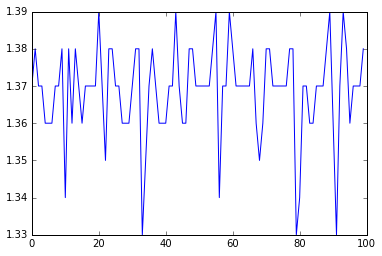

In [3]:

with open("raw_data.txt", "r") as raw_data_txt:
    loaded_data = raw_data_txt.readlines()
    
signal = loaded_data
plt.plot(signal[:100])

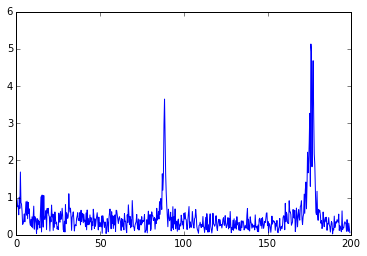

In [4]:
dft = fft(signal)
fs = 1000
N = len(dft)
freqs = [i*fs/N for i in range(N)]
plt.plot(freqs[1:600], np.abs(dft[1:600]))